In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
def createGeneratePrimaries(common_dir = '/home/ebagli/geant4/examples/MC_LHCB/',
                            BR = 10,
                            L = 1,
                            particle = 'proton',
                            EC = 'Si220pl',
                            energy = 400,
                            material = 'G4_Si',
                            particle_number = 1000):
    common_part = str(L) + '_' + str(BR) + '_' + str(energy) + '_' + particle + '_' + EC
        
    out_filename = common_dir + 'mac/sim_' + common_part + '.mac'

    out_file = open(out_filename,"w")

    out_file.write('/xtal/setMaterial ' + material + '\n')
    out_file.write('/xtal/setSize 50. 50. ' + str(L) + ' mm\n')
    out_file.write('/xtal/setAngle 0.0 0.0 0.0 degree\n')
    out_file.write('/xtal/setBR ' + str(BR) + ' 0.0 0.0 m\n')
    out_file.write('/xtal/setEC data/' + EC + '\n')
    out_file.write('\n')

    out_file.write('/run/initialize\n')
    out_file.write('/gps/particle ' + particle + '\n')
    out_file.write('/gps/ene/mono ' + str(energy) + ' GeV\n')
    out_file.write('/gps/direction 0 0 1\n')
    out_file.write('/gps/ang/type focused\n\n')
    out_file.write('/gps/pos/type Point\n')
    out_file.write('/gps/pos/centre 0. 0. -150. cm\n')
    out_file.write('/run/beamOn ' + str(particle_number))
    out_file.close()

    return common_part

def getMeanFields(filename,label,xlims,xcut=0,ploty=False,bins=401):
    bins = np.linspace(xlims[0],xlims[1],bins)
    data = np.loadtxt(filename,delimiter=',')
    data = data[np.where(abs(data[:,6])>xcut)]
    vals = [np.mean(data[:,6]),np.mean(data[:,7]),np.std(data[:,6]),np.std(data[:,7])]
    print('Configuration: ' + label)
    print('Average Horizontal Field [eV/A]: ' + str(vals[0]) + ' +- ' + str(vals[2]))
    print('Average Vertical   Field [eV/A]: ' + str(vals[1]) + ' +- ' + str(vals[3]))
    print('\n')
    if ploty==True:
        plt.hist(data[:,7],bins=bins,histtype='step',label=label,normed=True)
    else:
        plt.hist(data[:,6],bins=bins,histtype='step',label=label,normed=True)
    return vals

In [4]:
def createMultiFile(BR,
                    L,
                    particle,
                    EC,
                    energy,
                    material,
                    particle_number,
                    filenamesh = 'start_400_posneg',
                    common_dir='/home/ebagli/geant4/examples/MC_LHCB/'):
    sh_filename = common_dir + filenamesh + '.sh'
    sh_file = open(sh_filename,"w")
    for i in range(len(BR)):
        filename = createGeneratePrimaries(common_dir = common_dir,
                                            BR = BR[i],
                                            L = L[i],
                                            particle = particle[i],
                                            EC = EC[i],
                                            energy = energy[i],
                                            material = material[i],
                                            particle_number = particle_number[i])
        sh_file.write('./channeling mac/sim_' + filename + '.mac\n')
        sh_file.write('cat out_nt_sim_t*.csv > sim_' + filename + '.csv\n')
    sh_file.close()

In [134]:
BR = [10,10,10,10,0,10]
L  = [10,10,10,10,1,1]
particle = ['proton','anti_proton','proton','anti_proton','proton','proton']
EC = ['Si220pl','Si220pl','Si110ax','Si110ax','Si220pl','Si220pl']
energy = [400,400,400,400,400,400]
material = ['G4_Si','G4_Si','G4_Si','G4_Si','G4_Si','G4_Si']
particle_number = [10000,10000,10000,10000,10000,10000]
common_dir='/home/ebagli/geant4/examples/MC_LHCB/'

createMultiFile(BR = BR,
                L = L,
                particle = particle,
                EC = EC,
                energy = energy,
                material = material,
                particle_number = particle_number,
                filenamesh = 'start_400_posneg',
                common_dir=common_dir)

In [136]:
BR = [10,10,10,10,10,10]
L  = [100,100,100,100,100,100]
particle = ['proton','proton','proton','anti_proton','anti_proton','anti_proton']
EC = ['Si220pl','Si220pl','Si220pl','Si220pl','Si220pl','Si220pl']
energy = [1000,2000,3000,1000,2000,3000]
material = ['G4_Si','G4_Si','G4_Si','G4_Si','G4_Si','G4_Si']
particle_number = [10000,10000,10000,10000,10000,10000]
common_dir = "/home/ebagli/Dropbox/Geant4/MC_LHCB/python/"

createMultiFile(BR = BR,
                L = L,
                particle = particle,
                EC = EC,
                energy = energy,
                material = material,
                particle_number = particle_number,
                filenamesh = 'start_E',
                common_dir=common_dir)

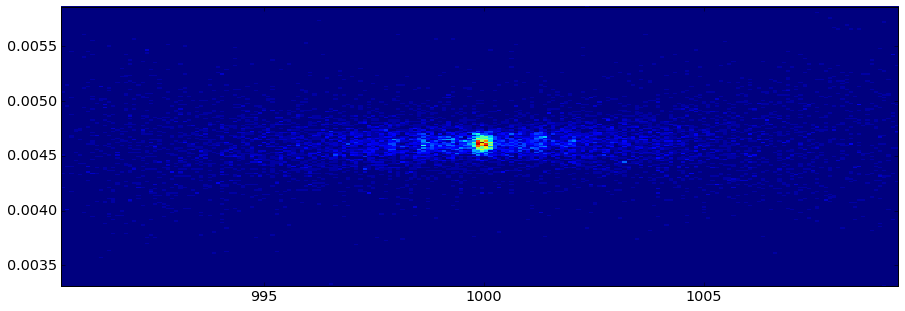

In [137]:
filename = '/home/ebagli/geant4/examples/MC_LHCB/sim_10_10_400_proton_Si220pl.csv'

data = np.loadtxt(filename,delimiter=',')
bins = np.linspace(-300,300,401)
dataf = data[np.where(np.logical_and(data[:,4]>950,data[:,4]<1010))]

plt.hist2d(dataf[:,4],dataf[:,6],bins=[200,200])
plt.show()

Configuration: 400 GeV - anti-proton - AC110 - L 10 - R 10
Average Horizontal Field [eV/A]: -0.0016875754439 +- 0.00177978752419
Average Vertical   Field [eV/A]: -6.62624856389e-06 +- 0.0007913278369


Configuration: 400 GeV - proton - AC110 - L 10 - R 10
Average Horizontal Field [eV/A]: 0.00218600908982 +- 0.00131929637707
Average Vertical   Field [eV/A]: 1.71216603153e-05 +- 0.00101064586626


Configuration: 400 GeV - anti-proton - PC110 - L 10 - R 10
Average Horizontal Field [eV/A]: -0.00294863419351 +- 0.00224521874362
Average Vertical   Field [eV/A]: 0.0 +- 0.0


Configuration: 400 GeV - proton - PC110 - L 10 - R 10
Average Horizontal Field [eV/A]: 0.00422173551624 +- 0.00129624702969
Average Vertical   Field [eV/A]: 0.0 +- 0.0




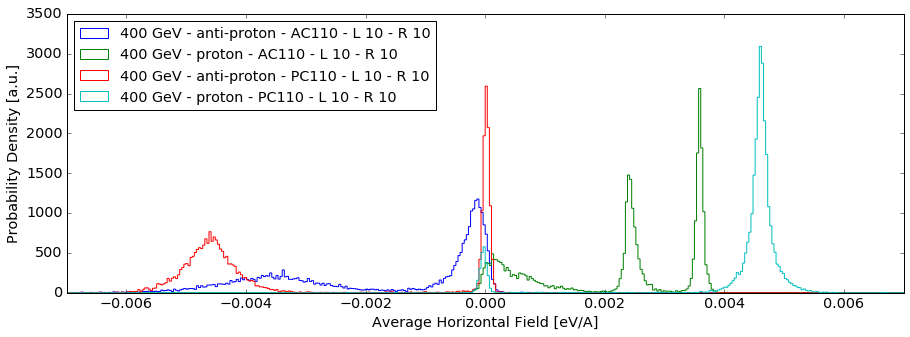

In [181]:
xlims = [-0.007,0.007]
xcut = 0.0
datadir = '../../../Physic_Documents/2017/LHCB/SimulationResults/'
datadir = "/home/ebagli/geant4/examples/MC_LHCB/"

getMeanFields(datadir + 'sim_10_10_400_anti_proton_Si110ax.csv',
              label='400 GeV - anti-proton - AC110 - L 10 - R 10',xlims=xlims,xcut=xcut)

getMeanFields(datadir + 'sim_10_10_400_proton_Si110ax.csv',
              label='400 GeV - proton - AC110 - L 10 - R 10',xlims=xlims,xcut=xcut)

getMeanFields(datadir + 'sim_10_10_400_anti_proton_Si220pl.csv',
              label='400 GeV - anti-proton - PC110 - L 10 - R 10',xlims=xlims,xcut=xcut)

getMeanFields(datadir + 'sim_10_10_400_proton_Si220pl.csv',
              label='400 GeV - proton - PC110 - L 10 - R 10',xlims=xlims,xcut=xcut)
plt.legend(loc='upper left')
plt.xlim(xlims[0],xlims[1])
plt.xlabel('Average Horizontal Field [eV/A]')
plt.ylabel('Probability Density [a.u.]')
plt.savefig('probdensPosNegX.png',format='png')
plt.show()

Configuration: 400 GeV - anti-proton - AC110 - L 10 - R 10
Average Horizontal Field [eV/A]: -0.0016875754439 +- 0.00177978752419
Average Vertical   Field [eV/A]: -6.62624856389e-06 +- 0.0007913278369


Configuration: 400 GeV - proton - AC110 - L 10 - R 10
Average Horizontal Field [eV/A]: 0.00218600908982 +- 0.00131929637707
Average Vertical   Field [eV/A]: 1.71216603153e-05 +- 0.00101064586626




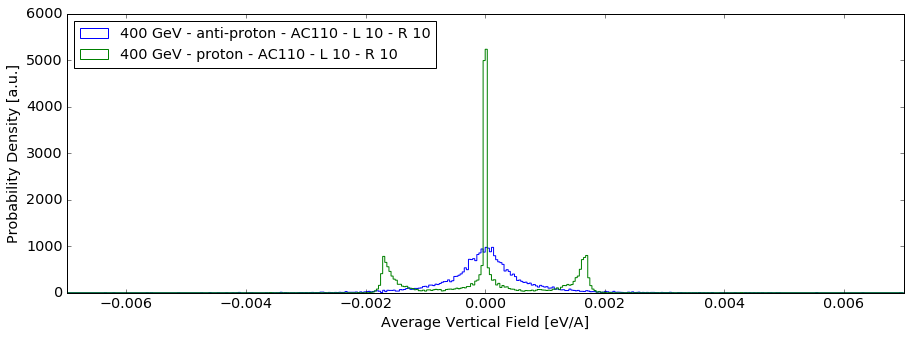

In [182]:
xlims = [-0.007,0.007]
xcut = 0.0
datadir = "/home/ebagli/geant4/examples/MC_LHCB/"
getMeanFields(datadir + 'sim_10_10_400_anti_proton_Si110ax.csv',
              label='400 GeV - anti-proton - AC110 - L 10 - R 10',xlims=xlims,xcut=xcut,ploty=True)
getMeanFields(datadir + 'sim_10_10_400_proton_Si110ax.csv',
              label='400 GeV - proton - AC110 - L 10 - R 10',xlims=xlims,xcut=xcut,ploty=True)
plt.legend(loc='upper left')
plt.xlim(xlims[0],xlims[1])
plt.xlabel('Average Vertical Field [eV/A]')
plt.ylabel('Probability Density [a.u.]')
plt.savefig('probdensPosNegY.png',format='png')
plt.show()

Configuration: 400 GeV - proton - PC110 - L 01 - R infty
Average Horizontal Field [eV/A]: -6.56953749974e-07 +- 0.000755201680365
Average Vertical   Field [eV/A]: 0.0 +- 0.0


Configuration: 400 GeV - proton - PC110 - L 01 - R 10
Average Horizontal Field [eV/A]: 0.00422000058325 +- 0.00150545460571
Average Vertical   Field [eV/A]: 0.0 +- 0.0


Configuration: 400 GeV - proton - PC110 - L 10 - R 10
Average Horizontal Field [eV/A]: 0.00422173551624 +- 0.00129624702969
Average Vertical   Field [eV/A]: 0.0 +- 0.0




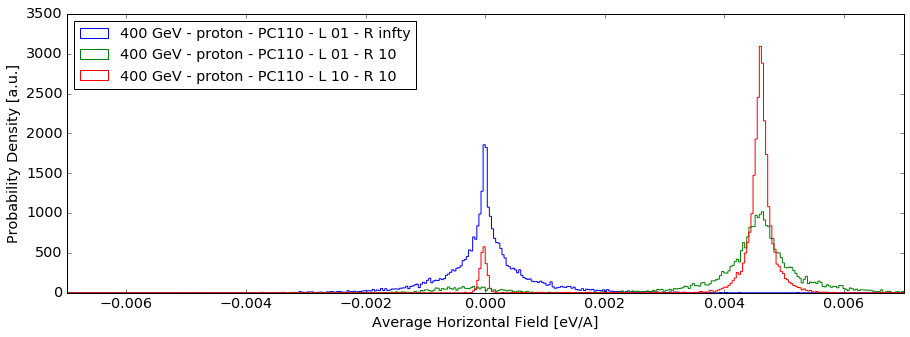

In [183]:
xlims = [-0.007,0.007]
xcut = 0.0
datadir = '../../../Physic_Documents/2017/LHCB/SimulationResults/'
datadir = "/home/ebagli/geant4/examples/MC_LHCB/"
getMeanFields(datadir + 'sim_1_0_400_proton_Si220pl.csv',
              label='400 GeV - proton - PC110 - L 01 - R infty',xlims=xlims,xcut=xcut)
getMeanFields(datadir + 'sim_1_10_400_proton_Si220pl.csv',
              label='400 GeV - proton - PC110 - L 01 - R 10',xlims=xlims,xcut=xcut)
getMeanFields(datadir + 'sim_10_10_400_proton_Si220pl.csv',
              label='400 GeV - proton - PC110 - L 10 - R 10',xlims=xlims,xcut=xcut)
plt.legend(loc='upper left')
plt.xlim(xlims[0],xlims[1])
plt.xlabel('Average Horizontal Field [eV/A]')
plt.ylabel('Probability Density [a.u.]')
plt.savefig('probdensPosLR.png',format='png')
plt.show()

Configuration: 1 TeV - proton - PC110 - L 100 - R 10
Average Horizontal Field [eV/A]: 0.0138346269608 +- 0.00748960114839
Average Vertical   Field [eV/A]: 0.0 +- 0.0


Configuration: 2 TeV - proton - PC110 - L 100 - R 10
Average Horizontal Field [eV/A]: 0.0272407320842 +- 0.0251721007909
Average Vertical   Field [eV/A]: 0.0 +- 0.0


Configuration: 3 TeV - proton - PC110 - L 100 - R 10
Average Horizontal Field [eV/A]: 0.0315129251867 +- 0.0438995685322
Average Vertical   Field [eV/A]: 0.0 +- 0.0




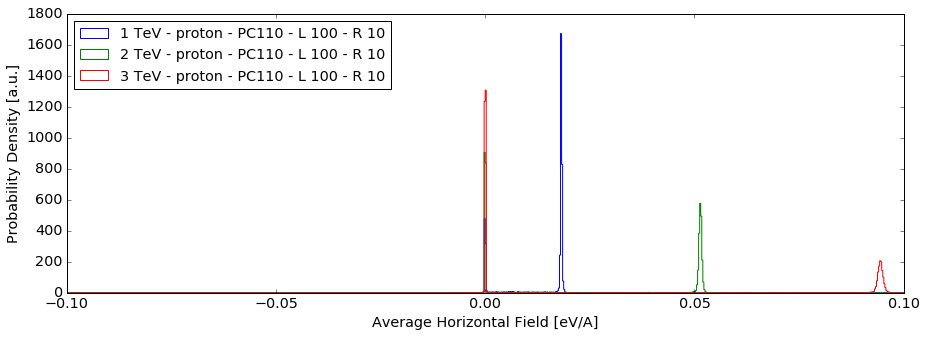

In [184]:
xlims = [-0.1,0.1]
xcut = 0.0
datadir = '../../../Physic_Documents/2017/LHCB/SimulationResults/'
#datadir = "/home/ebagli/geant4/examples/MC_LHCB/"
#getMeanFields(datadir + 'sim_10_10_400_proton_Si220pl.csv',label=' 0.4 TeV',xlims=xlims,xcut=xcut)
getMeanFields(datadir + 'sim_100_10_1000_proton_Si220pl.csv',
              label='1 TeV - proton - PC110 - L 100 - R 10',xlims=xlims,xcut=xcut,bins=801)
getMeanFields(datadir + 'sim_100_10_2000_proton_Si220pl.csv',
              label='2 TeV - proton - PC110 - L 100 - R 10',xlims=xlims,xcut=xcut,bins=801)
getMeanFields(datadir + 'sim_100_10_3000_proton_Si220pl.csv',
              label='3 TeV - proton - PC110 - L 100 - R 10',xlims=xlims,xcut=xcut,bins=801)
plt.legend(loc='upper left')
plt.xlim(xlims[0],xlims[1])
plt.xlabel('Average Horizontal Field [eV/A]')
plt.ylabel('Probability Density [a.u.]')
plt.savefig('probdensTeV.png',format='png')
plt.show()

In [5]:
filename = 'expdata/e212_positrons.txt'
exp = np.loadtxt(filename,delimiter=',')

In [6]:
filename = 'expdata/test.csv'
data = np.loadtxt(filename,delimiter=',')


In [9]:
filename = 'expdata/test1.csv'
data1 = np.loadtxt(filename,delimiter=',')


In [7]:
x = exp[:,0]
y = exp[:,1]

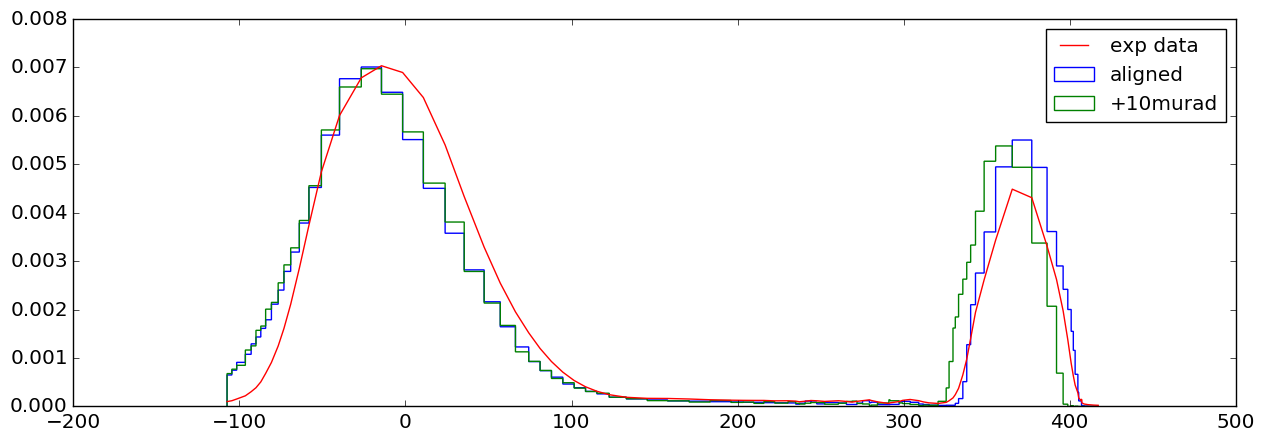

In [10]:
plt.hist(data[:,4],bins=x,normed=True,histtype='step',label='aligned')
plt.hist(data1[:,4],bins=x,normed=True,histtype='step',label='+10murad')
plt.plot(x,y,label='exp data')
#plt.yscale('log')
plt.legend()
plt.show()

In [290]:
def loadData(name):
    data = np.loadtxt(name,delimiter=',')
    data = data[data[:,4]!=-9999]
    data = data[abs(data[:,0])<2]
    return data

def plotIncomingX(name):
    data = loadData(name)
    plt.hist(data[:,4],bins=np.linspace(-100,300,100),normed=True,histtype='step',label='aligned')

def plotIncomingY(name):
    data = loadData(name)
    plt.hist(data[:,5],bins=np.linspace(-100,100,100),normed=True,histtype='step',label='aligned')


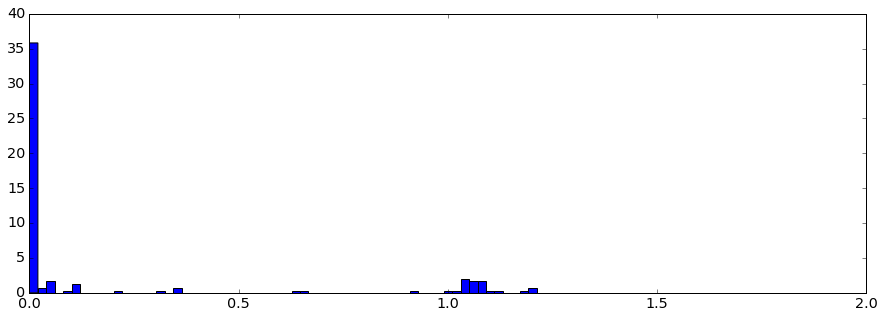

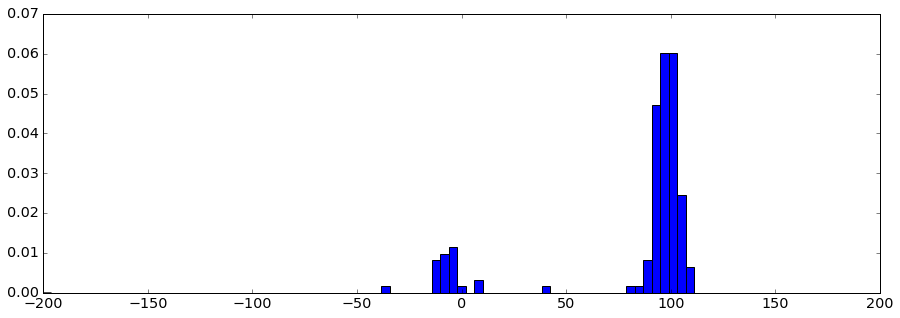

In [291]:
data = loadData('/home/ebagli/geant4/examples/MC_LHCB/test5.csv')
plt.hist(data[:,8],bins=np.linspace(0,2,100),normed=True)
plt.show()
plt.hist(data[:,4]-data[:,0],bins=np.linspace(-200,200,100),normed=True)
plt.show()

In [266]:
print(data[0])

[  6.87714000e+01  -7.14755000e+01   7.89869000e-01  -8.22533000e-01
   7.19588000e+01  -7.02291000e+01  -2.57492000e-03   0.00000000e+00]


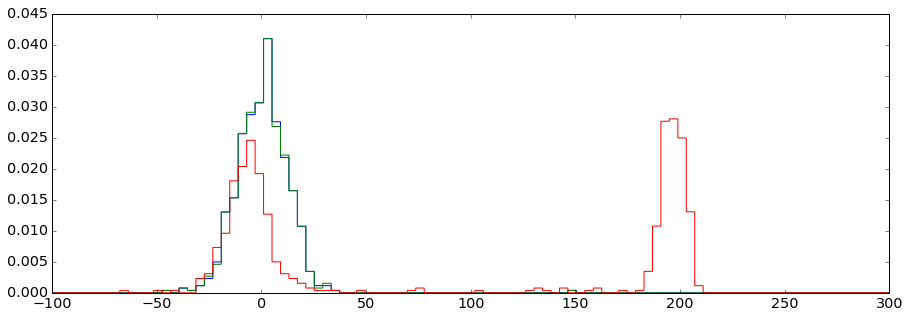

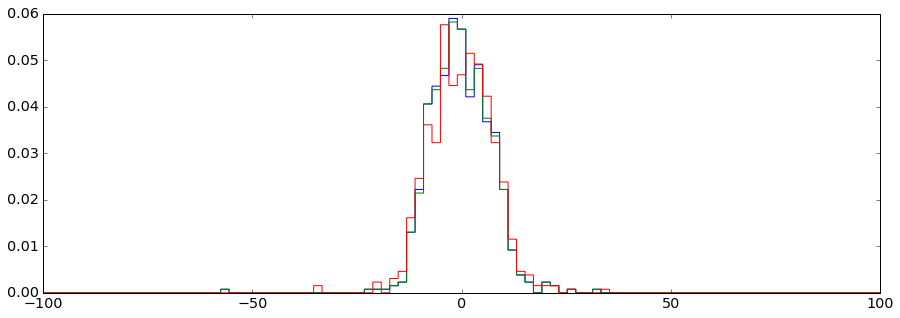

In [238]:
plotIncomingX('/home/ebagli/geant4/examples/MC_LHCB/test1.csv')
plotIncomingX('/home/ebagli/geant4/examples/MC_LHCB/test2.csv')
plotIncomingX('/home/ebagli/geant4/examples/MC_LHCB/test3.csv')
plt.show()
plotIncomingY('/home/ebagli/geant4/examples/MC_LHCB/test1.csv')
plotIncomingY('/home/ebagli/geant4/examples/MC_LHCB/test2.csv')
plotIncomingY('/home/ebagli/geant4/examples/MC_LHCB/test3.csv')
plt.show()